In [6]:
%matplotlib widget

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from skspatial.objects import Line, Points
import os

In [10]:

#extracting all the points of the channel mouth
#calculating the centroid of each four points

filename_1 = "../DATA/ALIGNED/SCN/7DTC.pdb"

with open(filename_1) as pdb_structure:
    lines = pdb_structure.readlines()

first_segment = list()
second_segment = list()
third_segment = list()
fourth_segment = list()

allCA = list()

for line in lines:
    line = line[:22] + ' ' + line[22:] # correct .pdb stupidity
    # print(line)

    if len(line.split()) > 5:
        residue_num = int(line.split()[5])
    else:
        break

    if 'CA' in line:
        x = float(line.split()[6])
        y = float(line.split()[7])
        z = float(line.split()[8])
        data = [x,y,z]
        allCA.append(data)

    if 381 <= residue_num <= 426 and ('CA' in line):
        x = float(line.split()[6])
        y = float(line.split()[7])
        z = float(line.split()[8])
        data = (x,y,z)
        first_segment.append(data)

    if 896 <= residue_num <= 941 and ('CA' in line):
        x = float(line.split()[6])
        y = float(line.split()[7])
        z = float(line.split()[8])
        data = (x,y,z)
        second_segment.append(data)

    if 1436 <= residue_num <= 1480 and ('CA' in line):
        x = float(line.split()[6])
        y = float(line.split()[7])
        z = float(line.split()[8])
        data = (x,y,z)
        third_segment.append(data)

    if 1731 <= residue_num <= 1776 and ('CA' in line):
        x = float(line.split()[6])
        y = float(line.split()[7])
        z = float(line.split()[8])
        data = (x,y,z)
        fourth_segment.append(data)

print(first_segment)

allCA = np.array(allCA)

[(116.924, 131.63, 151.572), (116.298, 127.918, 152.067), (117.675, 128.129, 155.608), (115.003, 130.636, 156.66), (112.05, 130.078, 154.301), (111.764, 126.337, 153.661), (113.636, 123.477, 152.022), (110.601, 122.929, 149.788), (111.312, 126.364, 148.299), (114.243, 125.045, 146.266), (111.569, 124.453, 143.623), (111.681, 128.219, 143.108), (115.467, 128.174, 142.772), (115.429, 125.307, 140.286), (112.776, 127.196, 138.349), (114.887, 130.354, 138.178), (118.279, 128.69, 137.567), (116.719, 126.79, 134.665), (114.332, 129.265, 133.048), (115.942, 132.601, 133.812), (119.667, 131.985, 134.147), (120.366, 129.099, 131.74), (117.805, 129.942, 129.097), (118.295, 133.719, 128.99), (122.096, 133.46, 128.956), (121.933, 130.954, 126.104), (119.376, 133.105, 124.274), (121.784, 136.04, 124.513), (124.557, 133.823, 123.148), (122.34, 132.578, 120.32), (121.086, 136.018, 119.264), (124.582, 137.521, 119.306), (125.898, 134.565, 117.296), (123.065, 134.895, 114.783), (123.71, 138.611, 114.27

In [13]:

centroids = []
x_values = []
y_values = []
z_values = []
for a, b, c, d in zip (first_segment, second_segment, third_segment, fourth_segment):
    x_centroid = (a[0] + b[0] + c[0] + d[0])/4
    y_centroid = (a[1] + b[1] + c[1] + d[1])/4
    z_centroid = (a[2] + b[2] + c[2] + d[2])/4
    x_values.append(x_centroid)
    y_values.append(y_centroid)
    z_values.append(z_centroid)
    data = (x_centroid, y_centroid, z_centroid)
    centroids.append(data)
centroids = np.array(centroids)
# print(centroids)
centroids = centroids[14:] # chop off the first few which don't fall in line
print(centroids)

[[132.824   132.16925 143.05375]
 [132.26425 133.034   141.68125]
 [132.09225 131.4285  140.2665 ]
 [130.86125 131.5095  139.17675]
 [130.7415  132.88075 137.7035 ]
 [131.2745  132.68375 136.82125]
 [130.978   131.5015  136.29075]
 [130.952   131.31575 135.16625]
 [130.91    131.58325 133.916  ]
 [130.2285  131.5395  132.955  ]
 [129.995   131.32225 131.918  ]
 [130.50325 131.07825 130.45975]
 [130.00325 130.92725 129.35125]
 [129.25125 130.79225 128.55775]
 [129.223   130.3555  127.31325]
 [129.26225 130.3605  125.91625]
 [128.6885  130.45925 124.95625]
 [128.422   130.0795  124.2465 ]
 [128.48025 129.60975 122.883  ]
 [128.31075 129.6505  121.47375]
 [127.61375 129.7515  120.82775]
 [127.629   129.40175 120.005  ]
 [127.9575  128.927   118.3475 ]
 [127.34    128.87225 117.231  ]
 [126.60225 129.0275  116.66925]
 [126.88225 128.6025  115.3785 ]
 [127.068   128.29575 113.8465 ]
 [126.43125 128.37075 112.895  ]
 [126.1055  128.21475 112.2865 ]
 [126.3025  127.57125 110.88575]
 [125.9257

In [17]:
# from sklearn.linear_model import LinearRegression

# xy = centroids[:,0:2]
# print(xy[:5])
# z = centroids[:,2]
# print()
# print(z[:5])
# reg = LinearRegression().fit(xy, z)
# print(reg.score(xy, z))
# print(reg.coef_)
# print(reg.intercept_)

# x_max = max(allCA[:,0])
# x_min = min(allCA[:,0])
# y_max = max(allCA[:,1])
# y_min = min(allCA[:,1])

# xy_line = np.array(list(zip(np.linspace(x_min, x_max, 200), np.linspace(y_max, y_min, 200))))
# z_line = reg.coef_[0]*xy_line[:,0] + reg.coef_[1]*xy_line[:,1] + reg.intercept_

points = Points(centroids)
line_fit_7DTD = Line.best_fit(points)

line_points = list()

for t in np.linspace(-100,100,500):
    line_points.append(line_fit_7DTD.to_point(t))

line_points = np.array(line_points)

# print(line_points)

point_7DTD = list(line_fit_7DTD.point)
dir_7DTD = list(line_fit_7DTD.direction)

dump = 'point ' + str(point_7DTD).strip('[]').replace(',','') + '\n' \
        + 'line ' + str(dir_7DTD).strip('[]').replace(',','')

print(dump)

'''
fh = os.open('line_7DTD.txt', os.O_RDWR|os.O_CREAT)
os.write(fh, bytes(dump,'ascii'))
os.close(fh)
'''

[[148.11516863 144.78484391 223.27727161]
 [148.03882928 144.72674854 222.88811977]
 [147.96248993 144.66865317 222.49896793]
 ...
 [110.17451007 115.91144361  29.86880626]
 [110.09817072 115.85334824  29.47965442]
 [110.02183137 115.79525286  29.09050258]]
point 129.06850000000003 130.29004838709676 126.18388709677419
line -0.19046668633411218 -0.14494795524405635 -0.970933845154998


"\nfh = os.open('line_7DTD.txt', os.O_RDWR|os.O_CREAT)\nos.write(fh, bytes(dump,'ascii'))\nos.close(fh)\n"

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)

ax.scatter(centroids[:,0], centroids[:,1], centroids[:,2], c = 'r', marker='o')
ax.scatter(allCA[:,0], allCA[:,1], allCA[:,2], c = 'b', marker='o')
ax.scatter(line_points[:,0], line_points[:,1], line_points[:,2], c = 'g', alpha=0.1)
ax.set_label(['x','y','z'])
plt.show()


In [18]:

filename_1 = "../DATA/ALIGNED/KCN/7EJ1.pdb"

with open(filename_1) as pdb_structure:
    lines = pdb_structure.readlines()

first_segment = list()
second_segment = list()
third_segment = list()
fourth_segment = list()

allCA_7EJ1 = list()

for line in lines:
    line = line[:22] + ' ' + line[22:] # correct .pdb stupidity
    # print(line)

    if len(line.split()) > 5:
        residue_num = int(line.split()[5])
        chain = line.split()[4]
    else:
        continue

    if 'CA' in line:
        x = float(line.split()[6])
        y = float(line.split()[7])
        z = float(line.split()[8])
        data = [x,y,z]
        allCA_7EJ1.append(data)

    if 455 <= residue_num <= 488 and ('CA' in line):
            
        x = float(line.split()[6])
        y = float(line.split()[7])
        z = float(line.split()[8])
        data = (x,y,z)
        if (chain == 'B'):
            first_segment.append(data)
        elif chain == 'D':
            second_segment.append(data)
        elif chain == 'F':
            third_segment.append(data)
        elif chain == 'H':
            fourth_segment.append(data)

print(first_segment)

allCA_7EJ1 = np.array(allCA_7EJ1)

[(157.438, 156.678, 106.947), (160.285, 157.98, 109.108), (158.726, 161.434, 109.187), (155.251, 160.223, 110.092), (156.522, 158.499, 113.229), (158.473, 161.672, 114.031), (155.315, 163.72, 113.511), (153.349, 161.306, 115.677), (155.617, 161.837, 118.677), (155.568, 165.574, 117.944), (151.771, 165.588, 118.164), (151.73, 163.717, 121.479), (154.456, 165.788, 123.113), (152.712, 169.027, 122.19), (150.082, 168.215, 124.809), (152.627, 167.622, 127.558), (154.679, 170.682, 126.598), (151.586, 172.894, 126.996), (149.341, 171.416, 129.691), (151.94, 171.43, 132.463), (152.58, 175.156, 133.253), (149.075, 176.494, 132.494), (146.964, 175.344, 135.535), (148.953, 177.695, 137.757), (147.678, 180.447, 135.443), (144.084, 179.301, 135.829), (144.514, 179.174, 139.606), (146.045, 182.651, 139.552), (143.122, 183.96, 137.522), (140.464, 182.469, 139.796), (142.33, 183.841, 142.806), (141.796, 187.308, 141.352), (138.369, 186.548, 139.893), (136.984, 185.536, 143.281)]


In [20]:
centroids_7EJ1 = []
x_values_7EJ1 = []
y_values_7EJ1 = []
z_values_7EJ1 = []
for a, b, c, d in zip(first_segment, second_segment, third_segment, fourth_segment):
    x_centroid = (a[0] + b[0] + c[0] + d[0])/4
    y_centroid = (a[1] + b[1] + c[1] + d[1])/4
    z_centroid = (a[2] + b[2] + c[2] + d[2])/4
    x_values_7EJ1.append(x_centroid)
    y_values_7EJ1.append(y_centroid)
    z_values_7EJ1.append(z_centroid)
    data = (x_centroid, y_centroid, z_centroid)
    centroids_7EJ1.append(data)
centroids_7EJ1 = np.array(centroids_7EJ1)
# print(centroids_7EJ1)
# centroids_7EJ1 = centroids_7EJ1[14:] # chop off the first few which don't fall in line

In [21]:
points = Points(centroids_7EJ1)
line_fit_7EJ1 = Line.best_fit(points)

line_points_7EJ1 = list()

for t in np.linspace(-100,100,500):
    line_points_7EJ1.append(line_fit_7EJ1.to_point(t))

line_points_7EJ1 = np.array(line_points_7EJ1)

# print(line_points_7EJ1)

point_7EJ1 = list(line_fit_7EJ1.point)
dir_7EJ1 = list(line_fit_7EJ1.direction)

dump = 'point ' + str(point_7EJ1).strip('[]').replace(',','') + '\n' \
        + 'line ' + str(dir_7EJ1).strip('[]').replace(',','')

print(dump)
'''
fh = os.open('line_7EJ1.txt', os.O_RDWR|os.O_CREAT)
os.write(fh, bytes(dump,'ascii'))
os.close(fh)
'''

point 142.24005147058827 170.85190441176468 126.2368088235294
line -0.08293029841612878 -0.04145980997171683 0.9956925478086702


"\nfh = os.open('line_7EJ1.txt', os.O_RDWR|os.O_CREAT)\nos.write(fh, bytes(dump,'ascii'))\nos.close(fh)\n"

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)

ax.scatter(centroids_7EJ1[:,0], centroids_7EJ1[:,1], centroids_7EJ1[:,2], c = 'r', marker='o')
ax.scatter(allCA_7EJ1[:,0], allCA_7EJ1[:,1], allCA_7EJ1[:,2], c = 'b', marker='o')
ax.scatter(line_points_7EJ1[:,0], line_points_7EJ1[:,1], line_points_7EJ1[:,2], c = 'g', alpha=0.1)
ax.set_label(['x','y','z'])
plt.show()


In [27]:

filename_1 = "../DATA/ALIGNED/KCN/6V01.pdb"

with open(filename_1) as pdb_structure:
    lines = pdb_structure.readlines()

first_segment = list()
second_segment = list()
third_segment = list()
fourth_segment = list()

allCA_6V01 = list()

for line in lines:
    line = line[:22] + ' ' + line[22:] # correct .pdb stupidity
    # print(line)

    if len(line.split()) > 5:
        residue_num = int(line.split()[5])
        chain = line.split()[4]
    else:
        continue

    if 'CA' in line:
        x = float(line.split()[6])
        y = float(line.split()[7])
        z = float(line.split()[8])
        data = [x,y,z]
        allCA_6V01.append(data)

    if 316 <= residue_num <= 361 and ('CA' in line):
            
        x = float(line.split()[6])
        y = float(line.split()[7])
        z = float(line.split()[8])
        data = (x,y,z)
        if (chain == 'A'):
            first_segment.append(data)
        elif chain == 'J':
            second_segment.append(data)
        elif chain == 'D':
            third_segment.append(data)
        elif chain == 'G':
            fourth_segment.append(data)
    
    if 536 <= residue_num <= 566 and ('CA' in line):
            
        x = float(line.split()[6])
        y = float(line.split()[7])
        z = float(line.split()[8])
        data = (x,y,z)
        if (chain == 'A'):
            first_segment.append(data)
        elif chain == 'J':
            second_segment.append(data)
        elif chain == 'D':
            third_segment.append(data)
        elif chain == 'G':
            fourth_segment.append(data)

# print(allCA_6V01)
print(first_segment)

allCA_6V01 = np.array(allCA_6V01)

[(144.451, 168.614, 106.272), (143.306, 166.114, 103.663), (140.008, 167.967, 103.177), (139.827, 171.754, 103.435), (136.805, 173.55, 101.908), (137.963, 175.518, 98.868), (134.896, 177.582, 97.981), (134.546, 180.733, 100.035), (130.98, 179.925, 101.079), (132.118, 176.734, 102.807), (134.921, 178.405, 104.748), (132.407, 180.654, 106.55), (130.261, 177.672, 107.573), (133.427, 175.857, 108.661), (134.352, 178.867, 110.822), (130.926, 179.098, 112.498), (130.579, 175.383, 113.12), (134.234, 175.229, 114.207), (133.853, 177.598, 117.163), (130.28, 176.7, 118.087), (130.907, 172.97, 118.21), (134.539, 172.811, 119.379), (133.199, 174.248, 122.641), (130.546, 171.534, 123.04), (132.982, 168.752, 122.184), (135.657, 170.054, 124.545), (133.093, 170.142, 127.372), (133.339, 166.49, 128.649), (137.028, 166.843, 129.512), (136.196, 169.425, 132.174), (133.08, 167.522, 133.238), (134.871, 164.223, 133.876), (137.835, 166.118, 135.329), (135.633, 167.456, 138.093), (133.86, 164.099, 138.38), 

In [28]:
centroids_6V01 = []
x_values_6V01 = []
y_values_6V01 = []
z_values_6V01 = []
for a, b, c, d in zip(first_segment, second_segment, third_segment, fourth_segment):
    x_centroid = (a[0] + b[0] + c[0] + d[0])/4
    y_centroid = (a[1] + b[1] + c[1] + d[1])/4
    z_centroid = (a[2] + b[2] + c[2] + d[2])/4
    x_values_6V01.append(x_centroid)
    y_values_6V01.append(y_centroid)
    z_values_6V01.append(z_centroid)
    data = (x_centroid, y_centroid, z_centroid)
    centroids_6V01.append(data)
centroids_6V01 = np.array(centroids_6V01)
# print(centroids_6V01)
# centroids_6V01 = centroids_6V01[14:] # chop off the first few which don't fall in line

points = Points(centroids_6V01)
line_fit_6V01 = Line.best_fit(points)

line_points_6V01 = list()

for t in np.linspace(-100,100,500):
    line_points_6V01.append(line_fit_6V01.to_point(t))

line_points_6V01 = np.array(line_points_6V01)

# print(line_points_6V01)

point_6V01 = list(line_fit_6V01.point)
dir_6V01 = list(line_fit_6V01.direction)

dump = 'point ' + str(point_6V01).strip('[]').replace(',','') + '\n' \
        + 'line ' + str(dir_6V01).strip('[]').replace(',','')

print(dump)


fh = os.open('line_6V01.txt', os.O_RDWR|os.O_CREAT)
os.write(fh, bytes(dump,'ascii'))
os.close(fh)

point 136.6861630434783 173.29081884057973 137.60565217391306
line -0.35991568489603765 0.13296609627266875 0.9234612699013551


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  


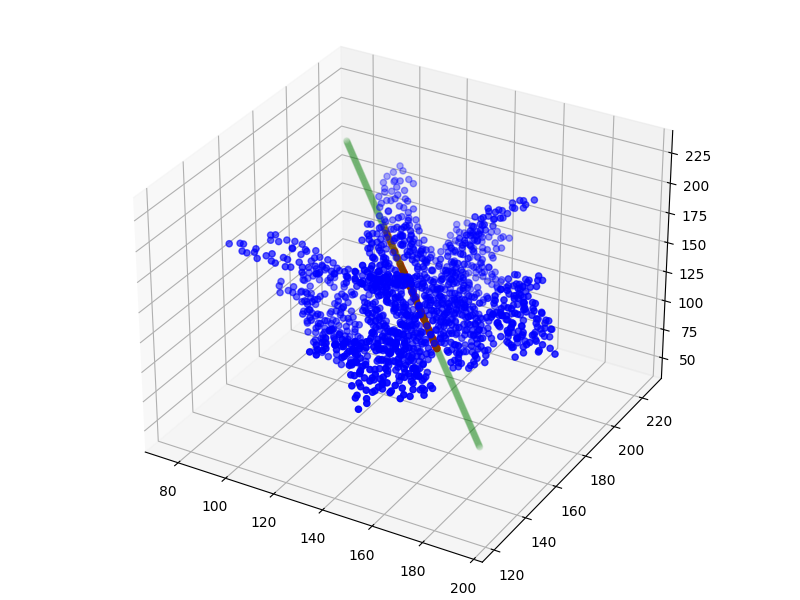

In [29]:
fig = plt.figure(figsize=(8,6))
ax = Axes3D(fig)

ax.scatter(centroids_6V01[:,0], centroids_6V01[:,1], centroids_6V01[:,2], c = 'r', marker='o')
ax.scatter(allCA_6V01[:,0], allCA_6V01[:,1], allCA_6V01[:,2], c = 'b', marker='o')
ax.scatter(line_points_6V01[:,0], line_points_6V01[:,1], line_points_6V01[:,2], c = 'g', alpha=0.05)
ax.set_label(['x','y','z'])
plt.show()
